In [8]:
from sympy import *
import matplotlib.pyplot as plt

m = MatrixSymbol('m', 3, 1) #wheel, body, hand
I = MatrixSymbol('I', 3, 1) #wheel, body, hand link inertias about CoM
N = MatrixSymbol('N', 3, 1) #wheel, shoulder, and elbow gear ratios
J = MatrixSymbol('J', 3, 1) #wheel, shoulder, and elbow motor rotor inertias 
L = MatrixSymbol('L', 2, 1) #upper arm, forearm
g = symbols('g') #gravity
r = symbols('r') #wheel radius

#states: [wheel position, pendulum angle, leg length, shoulder angle, elbow angle] 
q = MatrixSymbol('q', 5, 1)
qd = MatrixSymbol('\dot{q}', 5, 1)
qdd = MatrixSymbol('\ddot{q}', 5, 1)
tau = MatrixSymbol('tau', 4, 1)

# Unit vector (global coordinate system)
xhat = Matrix([1, 0])
yhat = Matrix([0, 1])

xhat_pend = cos(q[1])*xhat + sin(q[1])*yhat
yhat_pend = -sin(q[1])*xhat + cos(q[1])*yhat

xhat_upperarm = cos(q[3])*xhat_pend + sin(q[3])*yhat_pend
yhat_upperarm = -sin(q[3])*xhat_pend + cos(q[3])*yhat_pend

xhat_lowerarm = cos(q[4])*xhat_upperarm + sin(q[4])*yhat_upperarm
yhat_lowerarm = -sin(q[4])*xhat_upperarm + cos(q[4])*yhat_upperarm

p_wheel = (q[0] + q[1]*r)*xhat
p_body = simplify(p_wheel + q[2]*yhat_pend)
p_elbow = simplify(p_body - L[0]*yhat_upperarm)
p_hand = simplify(p_elbow - L[1]*yhat_lowerarm)

display(p_wheel, p_body, p_elbow, p_hand)

Matrix([
[r*q[1, 0] + q[0, 0]],
[                  0]])

Matrix([
[r*q[1, 0] - sin(q[1, 0])*q[2, 0] + q[0, 0]],
[                      cos(q[1, 0])*q[2, 0]]])

Matrix([
[r*q[1, 0] + sin(q[1, 0] + q[3, 0])*L[0, 0] - sin(q[1, 0])*q[2, 0] + q[0, 0]],
[                     -cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0])*q[2, 0]]])

Matrix([
[r*q[1, 0] + sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0] + q[0, 0]],
[                     -cos(q[1, 0] + q[3, 0])*L[0, 0] - cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] + cos(q[1, 0])*q[2, 0]]])

In [9]:
def derivative(x):
    x = Matrix([x])
    return x.jacobian(Matrix([q,qd])) * Matrix([qd,qdd])

pd_wheel = simplify(derivative(p_wheel))
pd_body = simplify(derivative(p_body))
pd_elbow = simplify(derivative(p_elbow))
pd_hand = simplify(derivative(p_hand))

a = Matrix([ #wheel, shoulder, and elbow joint angles referenced to global frame +x
    q[1] + pi/2, 
    q[1] + pi/2 - pi + q[3],
    q[1] + pi/2 - pi + q[3] + q[4],
])
ad = derivative(a)

display(pd_wheel, pd_body, pd_elbow, pd_hand, ad)

Matrix([
[r*\dot{q}[1, 0] + \dot{q}[0, 0]],
[                              0]])

Matrix([
[(r - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + \dot{q}[0, 0]],
[                     -sin(q[1, 0])*\dot{q}[1, 0]*q[2, 0] + cos(q[1, 0])*\dot{q}[2, 0]]])

Matrix([
[(r + cos(q[1, 0] + q[3, 0])*L[0, 0] - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0] + q[3, 0])*L[0, 0]*\dot{q}[3, 0] + \dot{q}[0, 0]],
[                    (sin(q[1, 0] + q[3, 0])*L[0, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0])*L[0, 0]*\dot{q}[3, 0] + cos(q[1, 0])*\dot{q}[2, 0]]])

Matrix([
[(cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (r + cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + \dot{q}[0, 0]],
[                    (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + cos(q[1, 0])*\dot{q}[2, 0]]])

Matrix([
[                                \dot{q}[1, 0]],
[                \dot{q}[1, 0] + \dot{q}[3, 0]],
[\dot{q}[1, 0] + \dot{q}[3, 0] + \dot{q}[4, 0]]])

Matrix([
[0.047625],
[       0]])

Matrix([
[-0.192087769302102],
[ 0.438791280945186]])

Matrix([
[-0.09900329785276],
[0.382079014414949]])

Matrix([
[0.0953495264132674],
[   0.4292699001856]])

Matrix([
[   2.0707963267949],
[-0.547197551196598],
[ 0.238200612200851]])

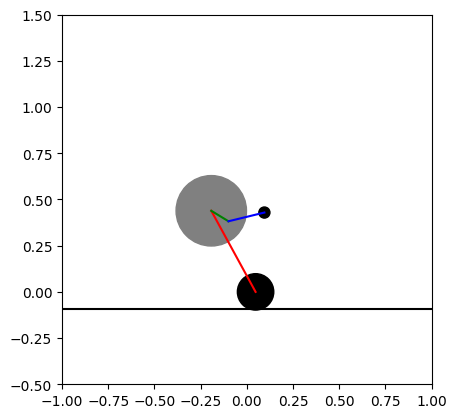

In [43]:
q_test = Matrix([0, 0.5, 0.5, pi/6, pi/4])
L_test = Matrix([0.109, 0.200])
r_test = 0.09525
subs_dict = {q:q_test, L:L_test, r:r_test}

p_wheel_n = p_wheel.subs(subs_dict).n()
p_body_n = p_body.subs(subs_dict).n()
p_elbow_n = p_elbow.subs(subs_dict).n()
p_hand_n = p_hand.subs(subs_dict).n()
a_n = a.subs(subs_dict).n()
display(p_wheel_n, p_body_n, p_elbow_n, p_hand_n, a_n)

fig, ax = plt.subplots()
def plot_link(ax, a, b, c='k'):
    ax.plot([a[0], b[0]], [a[1], b[1]], c=c)

plot_link(ax, (-1,-r_test), (1,-r_test))
plot_link(ax, p_wheel_n, p_body_n, 'r')
plot_link(ax, p_body_n, p_elbow_n, 'g')
plot_link(ax, p_elbow_n, p_hand_n, 'b')

ax.add_artist(plt.Circle((p_wheel_n[0], p_wheel_n[1]), 0.197/2, color='black'))
ax.add_artist(plt.Circle((p_body_n[0], p_body_n[1]), 2*r_test, color='gray'))
ax.add_artist(plt.Circle((p_hand_n[0], p_hand_n[1]), 0.030, color='black'))

ax.set_xlim([-1, 1])
ax.set_ylim([-0.5, 1.5])
ax.set_aspect('equal')
plt.show()

In [11]:
# Kinetic energy of structural parts
T_lin = 0.5 * (m[0]*pd_wheel.dot(pd_wheel) + m[1]*pd_body.dot(pd_body) + m[2]*pd_hand.dot(pd_hand))      # rectilinear KE
T_rot = 0.5 * (I[0]*ad[0]*ad[0] + I[1]*ad[1]*ad[1] + I[2]*ad[2]*ad[2])      # rotational link KE

# Kinetic energy of motor
v_mot = Matrix([
    N[0]*qd[0], #wheel motor
    N[1]*qd[3], #shoulder motor
    N[2]*qd[4], #elbow motor
])
T_mot = 0.5 * (J[0]*v_mot[0]*v_mot[0] + J[1]*v_mot[1]*v_mot[1] + J[2]*v_mot[2]*v_mot[2])

T_lin = nsimplify(T_lin)
T_rot = nsimplify(T_rot)
T_mot = nsimplify(T_mot)
display(T_lin, T_rot, T_mot)

T = simplify(T_lin + T_rot + T_mot)     # Kinetic Energy

(r*\dot{q}[1, 0] + \dot{q}[0, 0])**2*m[0, 0]/2 + ((-sin(q[1, 0])*\dot{q}[1, 0]*q[2, 0] + cos(q[1, 0])*\dot{q}[2, 0])**2 + ((r - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + \dot{q}[0, 0])**2)*m[1, 0]/2 + (((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + cos(q[1, 0])*\dot{q}[2, 0])**2 + ((cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (r + cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + \dot{q}[0, 0])**2)*m[2, 0]/2

(\dot{q}[1, 0] + \dot{q}[3, 0])**2*I[1, 0]/2 + (\dot{q}[1, 0] + \dot{q}[3, 0] + \dot{q}[4, 0])**2*I[2, 0]/2 + I[0, 0]*\dot{q}[1, 0]**2/2

J[0, 0]*N[0, 0]**2*\dot{q}[0, 0]**2/2 + J[1, 0]*N[1, 0]**2*\dot{q}[3, 0]**2/2 + J[2, 0]*N[2, 0]**2*\dot{q}[4, 0]**2/2

In [12]:
# Potential energy of body and hand
V = simplify(p_body[1]*m[1]*g + p_hand[1]*m[2]*g)
display(V)

g*(-(cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0] + cos(q[1, 0])*m[1, 0]*q[2, 0])

In [13]:
# Define Lagrangian
Lag = T-V               # Lagrangian
Lag = simplify(nsimplify(Lag))

# Define Generalized Work
dW = tau[0]*qd[0] + tau[1]*qd[1]
display(Lag, dW)

g*((cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0] - cos(q[1, 0])*m[1, 0]*q[2, 0]) + (r*\dot{q}[1, 0] + \dot{q}[0, 0])**2*m[0, 0]/2 + ((sin(q[1, 0])*\dot{q}[1, 0]*q[2, 0] - cos(q[1, 0])*\dot{q}[2, 0])**2 + ((r - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + \dot{q}[0, 0])**2)*m[1, 0]/2 + (((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + cos(q[1, 0])*\dot{q}[2, 0])**2 + ((cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (r + cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + \dot{q}[0, 0])**2)*m[2, 0]/2 + (\d

\dot{q}[0, 0]*tau[0, 0] + \dot{q}[1, 0]*tau[1, 0]

In [14]:
# Euler-Lagrangian Equation of Motion (EoM)
EoM_LHS = zeros(5, 1)
for i in range(5):
    partial_dq_ = simplify(diff(Lag, qd[i]))
    partial_q_ = simplify(diff(Lag, q[i]))
    EoM_LHS[i] = derivative(partial_dq_)[0] - partial_q_

# EoM_RHS = Matrix([dW]).jacobian(qd)
display(EoM_LHS)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [44]:
M = simplify(EoM_LHS.jacobian(qdd))
display(M)

Matrix([
[                                                                                                               J[0, 0]*N[0, 0]**2 + m[0, 0] + m[1, 0] + m[2, 0],                                                                                                                                                                                 r*m[0, 0] + (r - cos(q[1, 0])*q[2, 0])*m[1, 0] + (r + cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0],                                                                           (-m[1, 0] - m[2, 0])*sin(q[1, 0]),                                                                                                                                                                                                          (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*m[2, 0],                                                                                                  

In [16]:
C = simplify(EoM_LHS.subs({qdd:Matrix([0,0,0,0,0])}))
display(C)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [46]:
from sympy.codegen.ast import CodeBlock, Assignment

code = CodeBlock(Assignment(MatrixSymbol('M_code',5,5), M)).cse()
print(ccode(code))

x0 = m[1] + m[2];
x1 = r - cos(q[1])*q[2];
x2 = q[1] + q[3];
x3 = cos(x2)*L[0];
x4 = x2 + q[4];
x5 = cos(x4)*L[1];
x6 = x3 + x5;
x7 = x1 + x6;
x8 = r*m[0] + x1*m[1] + x7*m[2];
x9 = sin(q[1]);
x10 = -x0*x9;
x11 = x6*m[2];
x12 = x5*m[2];
x13 = sin(x2)*L[0] + sin(x4)*L[1];
x14 = I[1] + I[2];
x15 = r*x9;
x16 = x15*m[1];
x17 = sin(q[3]);
x18 = q[3] + q[4];
x19 = sin(x18);
x20 = x19*L[1];
x21 = x17*L[0] + x20;
x22 = m[2]*q[2];
x23 = cos(q[4])*L[0]*L[1]*m[2];
x24 = I[2] + pow(L[1], 2)*m[2];
x25 = r*x12 - x22*cos(x18)*L[1];
x26 = r*x3*m[2] - x22*cos(q[3])*L[0] + 2*x23 + x24 + x25 + I[1] + pow(L[0], 2)*m[2];
x27 = x23 + x24;
x28 = x25 + x27;
x29 = x21*m[2];
x30 = x20*m[2];
M_code[0] = x0 + J[0]*pow(N[0], 2) + m[0];
M_code[1] = x8;
M_code[2] = x10;
M_code[3] = x11;
M_code[4] = x12;
M_code[5] = x8;
M_code[6] = pow(r, 2)*m[0] + x14 + (pow(x1, 2) + pow(x9, 2)*pow(q[2], 2))*m[1] + (pow(x7, 2) + pow(x13 - x9*q[2], 2))*m[2] + I[0];
M_code[7] = -x16 + (-x15 + x21)*m[2];
M_code[8] = x26;
M_code[9] = x28

In [51]:
from sympy.codegen.ast import CodeBlock, Assignment

code = CodeBlock(Assignment(MatrixSymbol('C',5,1), C.subs(qd, MatrixSymbol('qd',5,1)))).cse()
print(ccode(code))

x0 = cos(q[1]);
x1 = x0*qd[2];
x2 = x1*qd[1];
x3 = q[1] + q[3];
x4 = sin(x3 + q[4]);
x5 = x4*L[1];
x6 = x5*qd[4];
x7 = x6*m[2];
x8 = sin(x3);
x9 = x8*L[0];
x10 = x5 + x9;
x11 = x10*qd[3] + x6;
x12 = m[2]*qd[3];
x13 = sin(q[1]);
x14 = x13*q[2];
x15 = g*x14;
x16 = 2*x2;
x17 = r*m[2];
x18 = pow(qd[1], 2);
x19 = cos(q[3])*L[0];
x20 = 2*qd[1];
x21 = x20*qd[2];
x22 = x19*x21;
x23 = L[1]*m[2];
x24 = pow(qd[4], 2);
x25 = sin(q[4])*L[0];
x26 = x24*x25;
x27 = sin(q[3]);
x28 = pow(qd[3], 2);
x29 = x18*m[2];
x30 = r*x29;
x31 = x28*m[2];
x32 = r*x31;
x33 = x20*x25;
x34 = x33*qd[4];
x35 = 2*qd[4];
x36 = x12*x35;
x37 = x25*L[1];
x38 = q[3] + q[4];
x39 = cos(x38);
x40 = x23*x39;
x41 = x12*x20;
x42 = r*x41;
x43 = sin(x38);
x44 = g*x0;
x45 = x18*q[2];
x46 = x39*L[1];
x47 = x21*x39;
x48 = x43*x45;
C[0] = -x12*(x10*qd[1] + x11) - x2*(m[1] + m[2]) - x7*(qd[1] + qd[3] + qd[4]) + ((-x1 + x14*qd[1])*m[1] - (x1 + x11 + (x10 - x14)*qd[1])*m[2])*qd[1];
C[1] = g*x4*L[1]*m[2] + g*x8*L[0]*m[2] - 2*r*x12*x6 + r*x13*

In [17]:
lambdify([q, qd, L, I, J, N, g], M)
# lambdify([q, qd, L, I, J, N, g], c)

<function _lambdifygenerated(q, Dummy_49, L, I, J, N, g)>

In [18]:
print(python(M))

r = Symbol('r')
e = ImmutableDenseMatrix([[J[0, 0]*N[0, 0]**2 + m[0, 0] + m[1, 0] + m[2, 0], r*m[0, 0] + (r - cos(q[1, 0])*q[2, 0])*m[1, 0] + (r + cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0], (-m[1, 0] - m[2, 0])*sin(q[1, 0]), (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*m[2, 0], cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*m[2, 0]], [r*m[0, 0] + (r - cos(q[1, 0])*q[2, 0])*m[1, 0] + (r + cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0], r**2*m[0, 0] + ((r - cos(q[1, 0])*q[2, 0])**2 + sin(q[1, 0])**2*q[2, 0]**2)*m[1, 0] + ((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])**2 + (r + cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])**2)*m[2, 0] + I[0, 0] + I[1, 0] + I[2, 0], -r*sin(q[1, 0])*m[1, 0] + (-r*sin(q[1, 0]) + sin(q[3, 0] + q[4, 0])*L[1, 0] 

In [19]:
print(python(c))

NameError: name 'c' is not defined